# Linear Regression
Example with Linear Regression

### Dependencies installation

In [7]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### 1. Dataset randomly generated

In [8]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X
y

array([[ 5.60443649],
       [ 4.79411076],
       [10.11784092],
       [ 4.63752489],
       [ 6.80231984],
       [ 8.63926558],
       [ 2.94707932],
       [ 5.51328023],
       [ 4.36124415],
       [ 7.06903986],
       [ 8.01627453],
       [ 5.20406246],
       [ 8.60129491],
       [ 6.51182802],
       [ 4.89368399],
       [ 4.00853718],
       [ 7.59194837],
       [ 7.34562409],
       [10.81170855],
       [ 4.88534734],
       [ 7.9220367 ],
       [ 8.94840345],
       [ 4.85082997],
       [10.53087409],
       [ 5.92983146],
       [ 7.39416333],
       [ 6.85283739],
       [ 5.16493753],
       [ 6.43637322],
       [ 8.39276013],
       [ 4.63457516],
       [ 6.69786794],
       [ 4.60883814],
       [ 6.83511098],
       [10.33336728],
       [ 6.9464148 ],
       [10.67267665],
       [ 2.93587717],
       [ 7.13761349],
       [ 5.06191448],
       [ 9.74879622],
       [ 8.00721614],
       [ 8.80970342],
       [ 7.80692823],
       [ 6.00709086],
       [ 8

#### 2. Visualizing the dataset

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

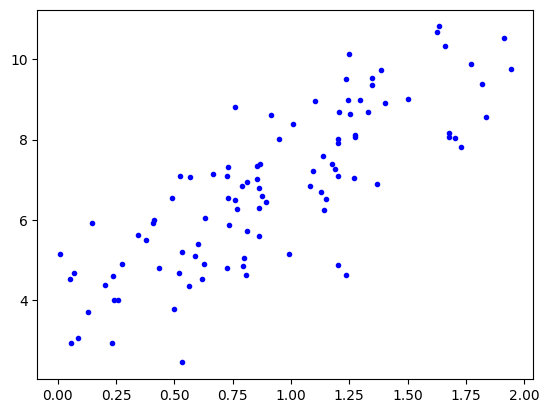

In [10]:
plt.plot(X, y, "b.")
plt.show()

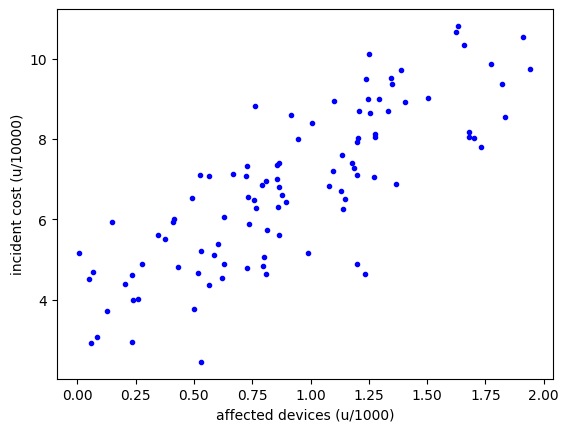

In [11]:
plt.plot(X, y, "b.")
plt.xlabel("affected devices (u/1000)")
plt.ylabel("incident cost (u/10000)")
plt.show()

##### 3. Modification of the dataset

In [12]:
import pandas as pd
data = {'#_affected_devices': X.flatten(), 'cost': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

/var/folders/kr/066v09l56c9_4l91brw4fwdc0000gn/T/ipykernel_15432/1663639371.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,#_affected_devices,cost
0,0.864408,5.604436
1,0.725544,4.794111
2,1.249313,10.117841
3,0.809217,4.637525
4,0.864014,6.802320
5,1.255165,8.639266
6,0.233480,2.947079
7,0.376453,5.513280
8,0.564119,4.361244
9,0.565070,7.069040


In [13]:
# Scale the data
df['#_affected_devices'] = df['#_affected_devices'] * 1000
df['#_affected_devices'] = df['#_affected_devices'].astype('int')
df['cost'] = df['cost'] * 10000
df['cost'] = df['cost'].astype('int')
df.head(10)

,#_affected_devices,cost
0,864,56044
1,725,47941
2,1249,101178
3,809,46375
4,864,68023
5,1255,86392
6,233,29470
7,376,55132
8,564,43612
9,565,70690


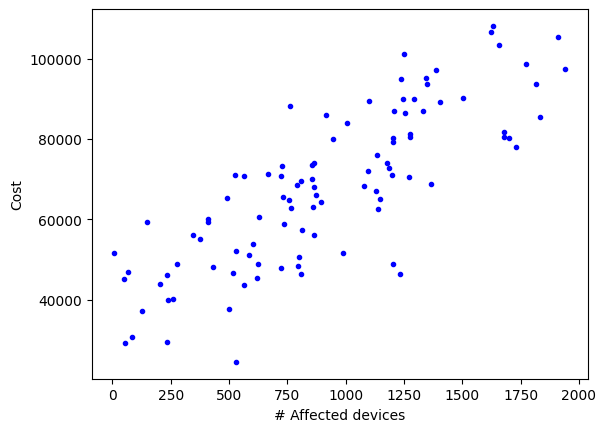

In [14]:
plt.plot(df['#_affected_devices'], df['cost'], "b.")
plt.xlabel("# Affected devices")
plt.ylabel('Cost')
plt.show()

### Using libraries and a dataset

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# First instance of the model and fit the hypothesis function
lr = LinearRegression()
X_train = df['#_affected_devices'].values.reshape(-1, 1)
y_train = df['cost'].values
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
# theta 0 parameter -> y = 0 + x1.01
lr.intercept_

37749.35062866441

In [18]:
# Theta 1 parameter -> y = 0 + x1.01
lr.coef_


array([32.74222866])

In [19]:
# Prediction with the min and max value from the dataset
X_min = df['#_affected_devices'].min()
X_min

9

In [20]:
X_max = df['#_affected_devices'].max()
X_max

1942

In [21]:
X_min_max = [[X_min],[X_max]]
X_min_max

[[9], [1942]]

In [22]:
prediction = lr.predict(X_min_max)
prediction

array([ 38044.03068664, 101334.75869458])

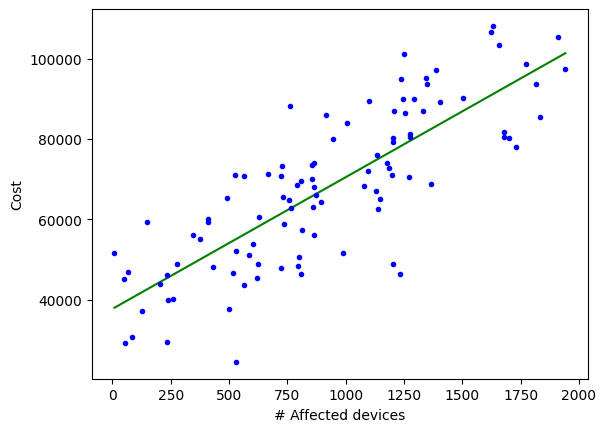

In [23]:
# Drawning the line
plt.plot(X_min_max, prediction, "g-")
plt.plot(df["#_affected_devices"], df["cost"], "b.")
plt.xlabel("# Affected devices")
plt.ylabel('Cost')
plt.show()

### Predicting new values

In [24]:
X_new = np.array([[1200]])
# prediction
new_prediction = lr.predict(X_new)
print('The new cost is:', new_prediction)

The new cost is: [77040.02502573]


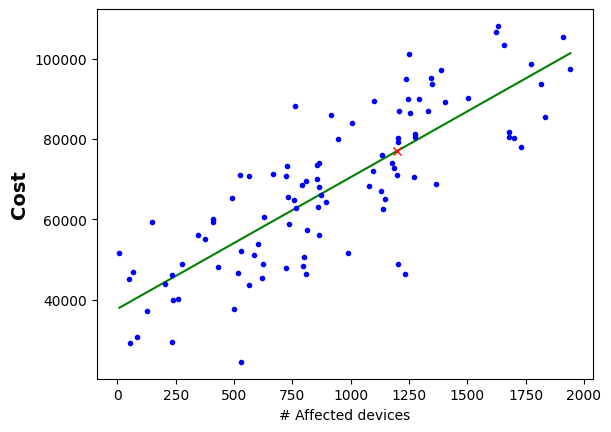

In [25]:
# Drawning the line
plt.plot(X_min_max, prediction, "g-")
plt.plot(df["#_affected_devices"], df["cost"], "b.")
plt.plot(X_new, new_prediction, "rx")
plt.xlabel("# Affected devices")
plt.ylabel('Cost', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show()